# Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\govin\Desktop\S.SARATH\MIT\7th SEM\IBM Project\assignments\abalone.csv')

In [2]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Perform below visualizations

1. Univariate Analysis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

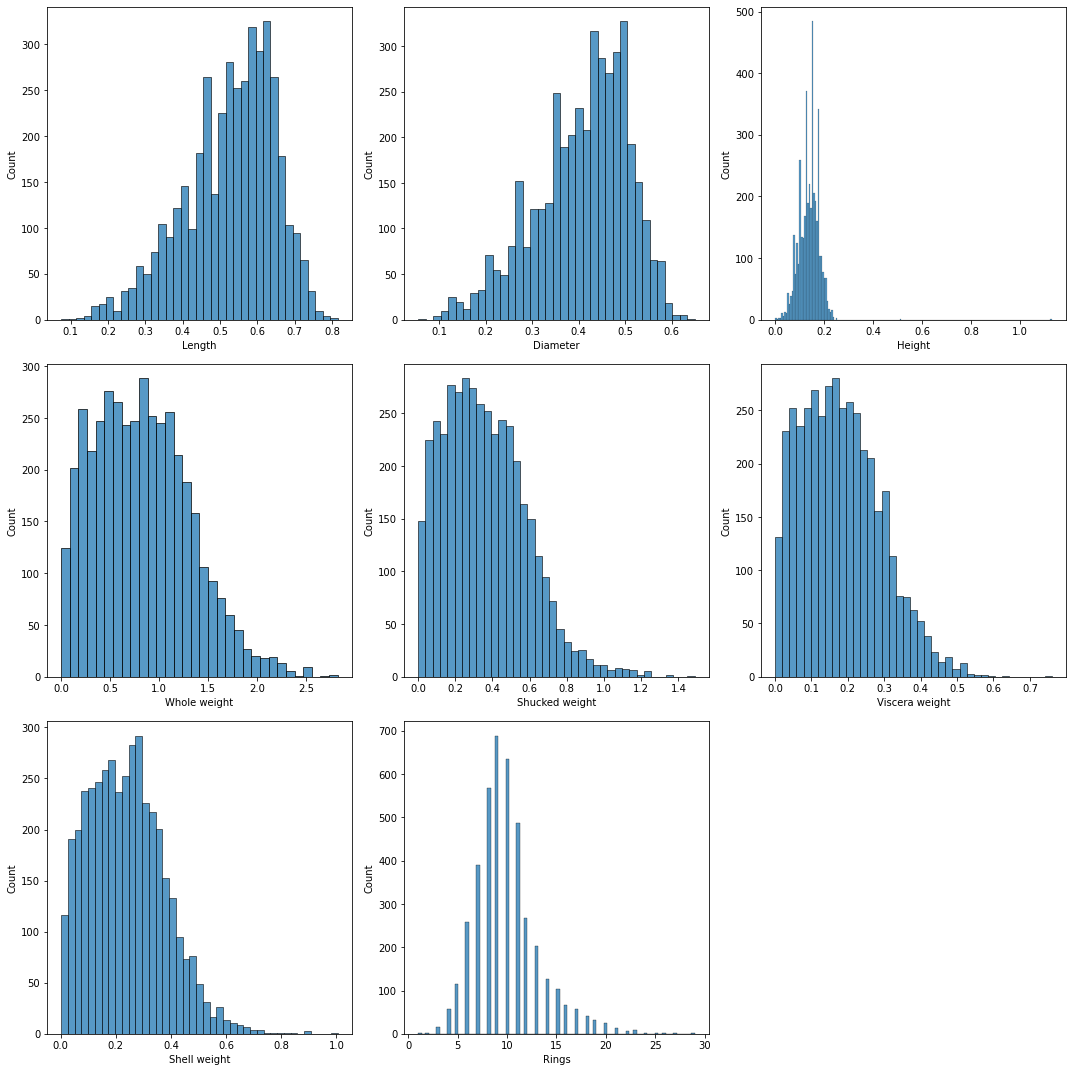

In [6]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:xlabel='Shucked weight'>

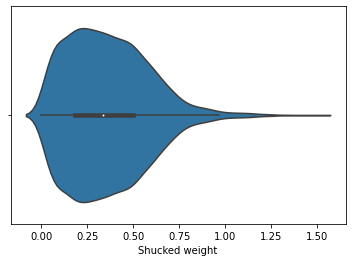

In [7]:
sns.violinplot(x=df["Shucked weight"])

2. Bivariate Analysis

Text(0, 0.5, 'Diameter')

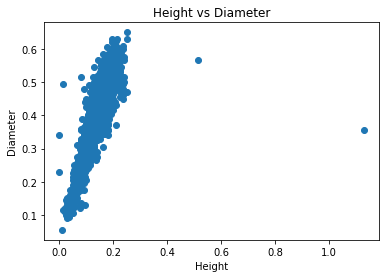

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df.Height,df.Diameter)
plt.title('Height vs Diameter')
plt.xlabel('Height')
plt.ylabel('Diameter')

3. Multi-variate Analysis

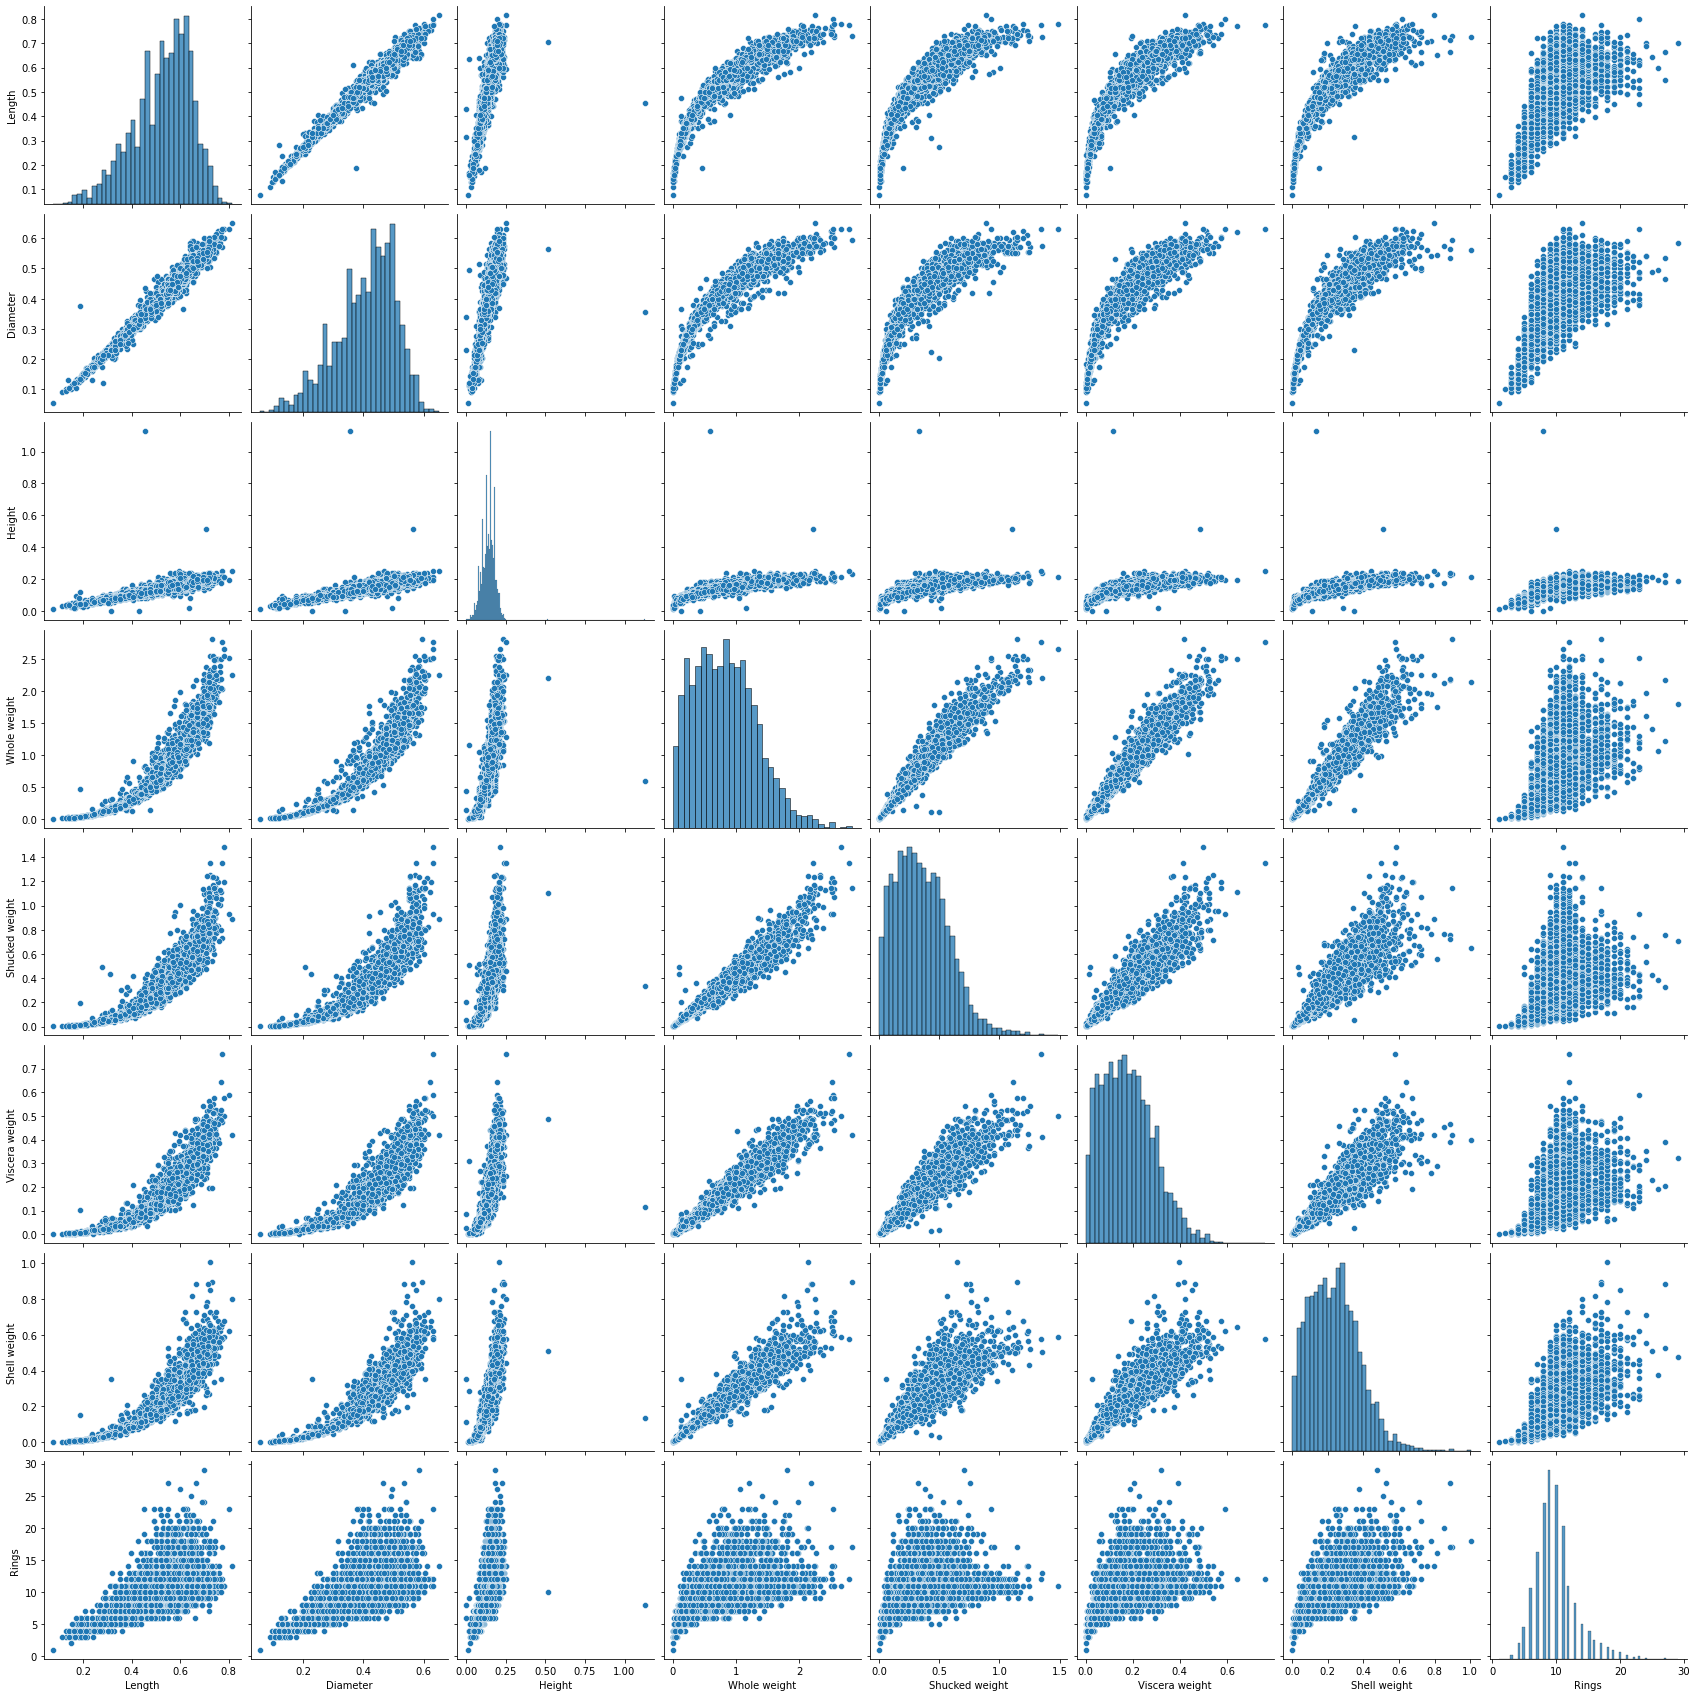

In [10]:
sns.pairplot(df);
plt.show()

#  Perform descriptive statistics on the dataset

In [11]:
data=pd.DataFrame(df)
print (data)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [12]:
print(data.sum())

Sex               MMFMIIFFMFFMMFFMIFMMMIFFFFFMMMMFMFFMFFFMFFIIII...
Length                                                      2188.72
Diameter                                                    1703.72
Height                                                       582.76
Whole weight                                                3461.66
Shucked weight                                              1501.08
Viscera weight                                               754.34
Shell weight                                                997.596
Rings                                                         41493
dtype: object


In [13]:
print(data.sum(1))

0       16.9045
1        8.1485
2       11.3700
3       11.9305
4        8.0540
         ...   
4172    13.9250
4173    13.0450
4174    12.5770
4175    13.4425
4176    17.2255
Length: 4177, dtype: float64


In [14]:
print(data.mean())

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64


In [60]:
data.median()

Sex               1.0000
Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [15]:
print(data.std())

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64


# Check for missing values and deal with them

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


# Find the outliers and replace the outliers

In [18]:
print(df['Shell weight'].skew())
df['Shell weight'].describe()

0.6209268251392077


count    4177.000000
mean        0.238831
std         0.139203
min         0.001500
25%         0.130000
50%         0.234000
75%         0.329000
max         1.005000
Name: Shell weight, dtype: float64

In [20]:
import numpy as np

#replacing the outliers
print(df['Shell weight'].quantile(0.50)) 
print(df['Shell weight'].quantile(0.95)) 
df['Shell weight'] = np.where(df['Shell weight'] > 325, 140, df['Shell weight'])
df.describe()

0.23399999999999999
0.48


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#  Check for Categorical columns and perform encoding

In [21]:
#perform encoding
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['Sex']

In [22]:
data_categorical = df[categorical_columns]
data_categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [23]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Sex'].unique()

array([2, 0, 1])

#  Split the data into dependent and independent variables

In [24]:
X= data.iloc[ : , :-1].values

y= data.iloc[ : , 4].values
print(X,y)

[[2.     0.455  0.365  ... 0.2245 0.101  0.15  ]
 [2.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
 [0.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
 ...
 [2.     0.6    0.475  ... 0.5255 0.2875 0.308 ]
 [0.     0.625  0.485  ... 0.531  0.261  0.296 ]
 [2.     0.71   0.555  ... 0.9455 0.3765 0.495 ]] [0.514  0.2255 0.677  ... 1.176  1.0945 1.9485]


In [25]:
from sklearn.model_selection import train_test_split

X= data['Whole weight']
y=data['Shucked weight']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(
X,y , random_state=104,test_size=0.25, shuffle=True)

# printing out train and test sets

print('X_train : ')
print(X_train.head())
print(X_train.shape)

print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)

print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)

print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train : 
437     0.2520
1331    0.8730
1611    0.7625
1394    1.5210
396     0.7155
Name: Whole weight, dtype: float64
(3132,)

X_test : 
4087    0.9840
1699    1.4890
1868    0.6965
2984    1.2240
5       0.3515
Name: Whole weight, dtype: float64
(1045,)

y_train : 
437     0.0915
1331    0.3820
1611    0.3270
1394    0.6440
396     0.3165
Name: Shucked weight, dtype: float64
(3132,)

y_test : 
4087    0.4865
1699    0.7150
1868    0.3045
2984    0.6180
5       0.1410
Name: Shucked weight, dtype: float64
(1045,)


# Scale the independent variables

In [27]:
#scaling
df_scaled =data.copy()
col_names = ['Shucked weight', 'Whole weight']
features = df_scaled[col_names]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,5.906676,5.751513,0.1010,0.1500,15
1,2,0.350,0.265,0.090,5.395785,5.331204,0.0485,0.0700,7
2,0,0.530,0.420,0.135,6.195325,5.859112,0.1415,0.2100,9
3,2,0.440,0.365,0.125,5.910218,5.721251,0.1140,0.1550,10
4,1,0.330,0.255,0.080,5.359483,5.297579,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,6.567204,6.240753,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,6.707101,6.472764,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,7.078980,6.763618,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,6.934656,6.782112,0.2610,0.2960,10


#  Split the data into training and testing

In [46]:
#testing and training
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train, X_test, y_train, y_test)

      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1794    1   0.575     0.450   0.130        0.8145          0.4030   
1466    2   0.515     0.425   0.145        0.9365          0.4970   
2275    2   0.655     0.525   0.185        1.2590          0.4870   
3929    0   0.650     0.515   0.215        1.4980          0.5640   
1955    0   0.645     0.510   0.180        1.6195          0.7815   
...   ...     ...       ...     ...           ...             ...   
2103    2   0.375     0.290   0.100        0.2760          0.1175   
3603    1   0.420     0.325   0.110        0.3250          0.1245   
3340    1   0.540     0.435   0.145        0.9700          0.4285   
3064    2   0.635     0.500   0.180        1.1540          0.4405   
3398    2   0.365     0.285   0.085        0.2205          0.0855   

      Viscera weight  Shell weight  
1794          0.1715        0.2130  
1466          0.1810        0.2185  
2275          0.2215        0.4450  
3929          0.3230   

In [47]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1794,1,0.575,0.450,0.130,0.8145,0.4030,0.1715,0.2130
1466,2,0.515,0.425,0.145,0.9365,0.4970,0.1810,0.2185
2275,2,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450
3929,0,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250
1955,0,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675
...,...,...,...,...,...,...,...,...
2103,2,0.375,0.290,0.100,0.2760,0.1175,0.0565,0.0850
3603,1,0.420,0.325,0.110,0.3250,0.1245,0.0755,0.1025
3340,1,0.540,0.435,0.145,0.9700,0.4285,0.2200,0.2640
3064,2,0.635,0.500,0.180,1.1540,0.4405,0.2315,0.3870


In [48]:
y_train

1794    10
1466     8
2275    20
3929    16
1955    12
        ..
2103     9
3603     7
3340    17
3064     9
3398     9
Name: Rings, Length: 3341, dtype: int64

In [49]:
X_test

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
341,0,0.620,0.510,0.205,1.3475,0.4775,0.2565,0.480
3413,2,0.490,0.395,0.120,0.6740,0.3325,0.1235,0.185
1088,1,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.120
98,2,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165
3661,1,0.550,0.415,0.150,0.7915,0.3535,0.1760,0.236
...,...,...,...,...,...,...,...,...
1662,0,0.605,0.455,0.145,0.9775,0.4680,0.1775,0.275
2656,2,0.545,0.420,0.120,0.7865,0.4030,0.1850,0.170
2185,2,0.445,0.340,0.120,0.4475,0.1930,0.1035,0.130
727,0,0.480,0.375,0.105,0.5250,0.2185,0.1195,0.155


In [50]:
y_test

341     14
3413     9
1088     6
98       7
3661    10
        ..
1662     9
2656     7
2185     9
727     12
3796    11
Name: Rings, Length: 836, dtype: int64

# Build the model

In [61]:
logreg = LogisticRegression()

# Train the model

In [62]:
logreg.fit(X_train, y_train)

C:\Users\govin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Test the model

In [53]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'. format(logreg.score (X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.261


# Measure the performance using metrics

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 0  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 15  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  9 30  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7 32 27  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 22 43 36 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 11 25 70 30  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 12 37 47 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  9 29 32 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 13 20 15  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  5  9 20 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  6 12  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  5  6  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.22      0.09      0.12        23
           6       0.23      0.20      0.21        46
           7       0.27      0.43      0.33        74
           8       0.30      0.37      0.33       115
           9       0.32      0.49      0.39       143
          10       0.23      0.39      0.29       119
          11       0.16      0.17      0.16        90
          12       0.00      0.00      0.00        62
          13       0.00      0.00      0.00        49
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        12
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00         9
          20       0.00      0.00      0.00         5
          21       0.00    

C:\Users\govin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
